In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data=pd.read_csv('kc_house_train_data.csv')
test_data=pd.read_csv('kc_house_test_data.csv')

In [4]:
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

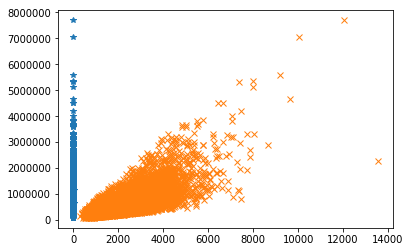

In [17]:
plt.plot(train_data['bedrooms'],train_data['price'],'*',
        train_data['sqft_living'],train_data['price'],'x')

## 1.
    Add 4 new variables in both your train_data and test_data.

    ‘bedrooms_squared’ = ‘bedrooms’*‘bedrooms’
    ‘bed_bath_rooms’ = ‘bedrooms’*‘bathrooms’
    ‘log_sqft_living’ = log(‘sqft_living’)
    ‘lat_plus_long’ = ‘lat’ + ‘long’

In [18]:
train_data['bedrooms_squared']=train_data['bedrooms']*train_data['bedrooms']
test_data['bedrooms_squared']=test_data['bedrooms']*test_data['bedrooms']

In [19]:
train_data['bed_bath_rooms']=train_data['bedrooms']*train_data['bathrooms']
test_data['bed_bath_rooms']=test_data['bedrooms']*test_data['bathrooms']

In [20]:
train_data['log_sqft_living']=np.log(train_data['sqft_living'])
test_data['log_sqft_living']=np.log(test_data['sqft_living'])

In [21]:
train_data['lat_plus_long']=train_data['lat']+train_data['long']
test_data['lat_plus_long']=test_data['lat']+test_data['long']

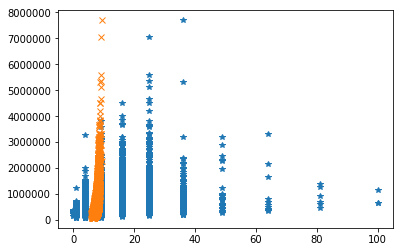

In [22]:
plt.plot(train_data['bedrooms_squared'],train_data['price'],'*',
        train_data['log_sqft_living'],train_data['price'],'x')

## 2.
  Before we continue let’s explain these new variables:
   1. Squaring bedrooms will increase the separation between not many bedrooms (e.g. 1) and lots of bedrooms (e.g. 4) since 1^2 = 1 but 4^2 = 16. Consequently this variable will mostly affect houses with many bedrooms.
   2. Bedrooms times bathrooms is what's called an "interaction" variable. It is large when both of them are large.
   3. Taking the log of square feet has the effect of bringing large values closer together and spreading out small values.
   4. Adding latitude to longitude is non-sensical but we will do it anyway

## Q.4
    Quiz Question: what are the mean (arithmetic average) values of your 4 new variables on TEST data? (round to 2 digits)


In [23]:
print("Means - \nbedroom_squared : %0.2f \nBed_bath : %0.2f \nlog_sqft : %0.2f \nlat_long : %0.2f"%(np.mean(test_data['bedrooms_squared']),np.mean(test_data['bed_bath_rooms']),np.mean(test_data['log_sqft_living']),np.mean(test_data['lat_plus_long'])))

Means - 
bedroom_squared : 12.45 
Bed_bath : 7.50 
log_sqft : 7.55 
lat_long : -74.65


## Q.5
    To estimate the regression coefficients/weights for predicting ‘price’ for the following three models:(In all 3 models include an intercept -- most software does this by default).

    1. Model 1: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’, and ‘long’
    2. Model 2: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, and ‘bed_bath_rooms’
    3. Model 3: ‘sqft_living’, ‘bedrooms’, ‘bathrooms’, ‘lat’,‘long’, ‘bed_bath_rooms’, ‘bedrooms_squared’, ‘log_sqft_living’, and ‘lat_plus_long’


In [24]:
data_dic={'sqft_living':train_data['sqft_living'],
          'bedrooms':train_data['bedrooms'],
         'bathrooms':train_data['bathrooms'],
         'lat':train_data['lat'],
         'long':train_data['long']}

In [25]:
x_train_df=pd.DataFrame(data_dic)

In [26]:
#Conversion from dataframe to an Array
x_train_1=np.array(x_train_df)
x_train_1.shape

(17384, 5)

In [31]:
x_train_1

array([[ 1.18000e+03,  3.00000e+00,  1.00000e+00,  4.75112e+01,
        -1.22257e+02],
       [ 2.57000e+03,  3.00000e+00,  2.25000e+00,  4.77210e+01,
        -1.22319e+02],
       [ 7.70000e+02,  2.00000e+00,  1.00000e+00,  4.77379e+01,
        -1.22233e+02],
       ...,
       [ 1.53000e+03,  3.00000e+00,  2.50000e+00,  4.76993e+01,
        -1.22346e+02],
       [ 1.60000e+03,  3.00000e+00,  2.50000e+00,  4.75345e+01,
        -1.22069e+02],
       [ 1.02000e+03,  2.00000e+00,  7.50000e-01,  4.75941e+01,
        -1.22299e+02]])

In [32]:
y_train=np.array(train_data['price']).reshape(-1,1)
y_train.shape

(17384, 1)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
def linear_regression_model(x,y):
    clf=LinearRegression()
    clf.fit(x,y)
    return clf

In [35]:
#Model 1 coefficients
clf1=linear_regression_model(x_train_1,y_train)

In [39]:
clf1.coef_,clf1.intercept_

(array([[ 3.12258646e+02, -5.95865332e+04,  1.57067421e+04,
          6.58619264e+05, -3.09374351e+05]]), array([-69075726.79256983]))

In [36]:
print("Bathroom slope for Model 1 : %f"%(clf1.coef_[0][2]))

Bathroom slope for Model 1 : 15706.742083


# Model 2

In [40]:
data_dic={'sqft_living':train_data['sqft_living'],
          'bedrooms':train_data['bedrooms'],
         'bathrooms':train_data['bathrooms'],
         'lat':train_data['lat'],
         'long':train_data['long'],
         'bed_bath_rooms':train_data['bed_bath_rooms']}
x_train_df=pd.DataFrame(data_dic)
x_train_2=np.array(x_train_df)
x_train_2.shape

(17384, 6)

In [41]:
clf2=linear_regression_model(x_train_2,y_train)
print("Bathroom slope for Model 2 : %f"%(clf2.coef_[0][2]))

Bathroom slope for Model 2 : -71461.308293


# Model 3

In [42]:
data_dic={'sqft_living':train_data['sqft_living'],
          'bedrooms':train_data['bedrooms'],
         'bathrooms':train_data['bathrooms'],
         'lat':train_data['lat'],
         'long':train_data['long'],
         'bed_bath_rooms':train_data['bed_bath_rooms'],
         'bedrooms_squared':train_data['bedrooms_squared'],
         'log_sqft_living':train_data['log_sqft_living'],
         'lat_plus_long':train_data['lat_plus_long']}
x_train_df=pd.DataFrame(data_dic)
x_train_3=np.array(x_train_df)
x_train_3.shape

(17384, 9)

In [43]:
clf3=linear_regression_model(x_train_3,y_train)
print("Bathroom slope for Model 3 : %f"%(clf3.coef_[0][2]))

Bathroom slope for Model 3 : 67060.781319


## Calculating RSS for all 3 models

In [44]:
def get_residual_sum_of_squares(clf,x_train,y):
    return (((clf.predict(x_train)-y)**2).sum())
        

In [45]:
rss1=get_residual_sum_of_squares(clf1,x_train_1,y_train)
rss1

967879963049545.8

In [46]:
rss2=get_residual_sum_of_squares(clf2,x_train_2,y_train)
rss2

958419635074070.0

In [47]:
rss3=get_residual_sum_of_squares(clf3,x_train_3,y_train)
rss3

903436455050479.2

## Calculating RSS on testing dataset

### Dataset for Model 1

In [48]:
data_dic={'sqft_living':test_data['sqft_living'],
          'bedrooms':test_data['bedrooms'],
         'bathrooms':test_data['bathrooms'],
         'lat':test_data['lat'],
         'long':test_data['long']}
x_test_df=pd.DataFrame(data_dic)
x_test_1=np.array(x_test_df)
x_test_1.shape

(4229, 5)

In [49]:
y_test=np.array(test_data['price']).reshape(-1,1)
y_test.shape

(4229, 1)

In [50]:
rss_test1=get_residual_sum_of_squares(clf1,x_test_1,y_test)
rss_test1=rss_test1/10000000000
rss_test1

22550.046979549035

### Dataset for Model 2

In [51]:
data_dic={'sqft_living':test_data['sqft_living'],
          'bedrooms':test_data['bedrooms'],
         'bathrooms':test_data['bathrooms'],
         'lat':test_data['lat'],
         'long':test_data['long'],
         'bed_bath_rooms':test_data['bed_bath_rooms']}
x_test_df=pd.DataFrame(data_dic)
x_test_2=np.array(x_test_df)
x_test_2.shape

(4229, 6)

In [52]:
rss_test2=get_residual_sum_of_squares(clf2,x_test_2,y_test)
rss_test2=rss_test2/10000000000
rss_test2

22337.74629764675

### Dataset for Model 3

In [53]:
data_dic={'sqft_living':test_data['sqft_living'],
          'bedrooms':test_data['bedrooms'],
         'bathrooms':test_data['bathrooms'],
         'lat':test_data['lat'],
         'long':test_data['long'],
         'bed_bath_rooms':test_data['bed_bath_rooms'],
         'bedrooms_squared':test_data['bedrooms_squared'],
         'log_sqft_living':test_data['log_sqft_living'],
         'lat_plus_long':test_data['lat_plus_long']}
x_test_df=pd.DataFrame(data_dic)
x_test_3=np.array(x_test_df)
x_test_3.shape

(4229, 9)

In [54]:
rss_test3=get_residual_sum_of_squares(clf3,x_test_3,y_test)
rss_test3=rss_test3/10000000000
rss_test3

25923.631920717995

P1. write a function that takes a data set, a list of features (e.g. [‘sqft_living’, ‘bedrooms’]), to be used as inputs, and a name of the output (e.g. ‘price’). This function should return a features_matrix (2D array) consisting of first a column of ones followed by columns containing the values of the input features in the data set in the same order as the input list. It should also return an output_array which is an array of the values of the output in the data set (e.g. ‘price’). e.g. if you’re using SFrames and numpy you can complete the following function:

In [55]:
def get_numpy_data(data_set,features,output):
    data_set['constant']=1
    features=['constant']+features
    features_matrix=np.array(data_set[features])
    output_array=np.array(data_set[output]).reshape(-1,1)
    return features_matrix,output_array

P2. If the features matrix (including a column of 1s for the constant) is stored as a 2D array (or matrix) and the regression weights are stored as a 1D array then the predicted output is just the dot product between the features matrix and the weights (with the weights on the right). Write a function ‘predict_output’ which accepts a 2D array ‘feature_matrix’ and a 1D array ‘weights’ and returns a 1D array ‘predictions’. e.g. in python:



In [56]:
def predict_outcome(feature_matrix,weights):
    predictions=np.dot(feature_matrix,weights)
    return predictions

P3. If we have a the values of a single input feature in an array ‘feature’ and the prediction ‘errors’ (predictions - output) then the derivative of the regression cost function with respect to the weight of ‘feature’ is just twice the dot product between ‘feature’ and ‘errors’. Write a function that accepts a ‘feature’ array and ‘error’ array and returns the ‘derivative’ (a single number). e.g. in python:

In [57]:
def feature_derivative(errors,feature):
    derivative=2*np.dot(np.transpose(errors),feature)
    return derivative

P4. Now we will use our predict_output and feature_derivative to write a gradient descent function. Although we can compute the derivative for all the features simultaneously (the gradient) we will explicitly loop over the features individually for simplicity. Write a gradient descent function that does the following:

1. Accepts a numpy feature_matrix 2D array, a 1D output array, an array of initial weights, a step size and a convergence tolerance.
2. While not converged updates each feature weight by subtracting the step size times the derivative for that feature given the current weights
3. At each step computes the magnitude/length of the gradient (square root of the sum of squared components)
4. When the magnitude of the gradient is smaller than the input tolerance returns the final weight vector.

In [58]:
def regression_gradient_descent(feature_matrix,output,initial_weights,step_size,tolerance):
    converged=False
    weights=np.array(initial_weights).reshape(-1,1)
    t=0
    while not converged:
        predictions=predict_outcome(feature_matrix,weights)
        errors=predictions-output
        
        gradient_sum_squares=0
        for i in range(len(weights)):
            feature=feature_matrix[:,i]
            derivative=feature_derivative(errors,feature)
            sum_sqr=derivative*derivative
            gradient_sum_squares=gradient_sum_squares+sum_sqr
            weights[i]=weights[i]-step_size*derivative
        
        gradient_magnitude=sqrt(gradient_sum_squares)
        print(t)
        t+=1
        if gradient_magnitude<tolerance:
            converged=True
    
    return (weights)
            
            

In [59]:
simple_features = ['sqft_living']
my_output= 'price'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

In [60]:
simple_weights = regression_gradient_descent(simple_feature_matrix, output,initial_weights, step_size,tolerance)

0
1
2
3
4
5
6
7
8
9
10
11


In [61]:
simple_weights

array([[-46999.88716555],
       [   281.91211918]])

In [62]:
test_simple_feature_matrix,test_output=get_numpy_data(test_data,simple_features,my_output)

In [63]:
predictions=predict_outcome(test_simple_feature_matrix,simple_weights)
predictions[0]

array([356134.443255])

In [64]:
def get_rss_predictions(predictions,test_output):
    rss=(predictions-test_output)**2
    rss=rss.sum(axis=0)
    return rss

In [65]:
rss_1=get_rss_predictions(predictions,test_output)
rss_1

array([2.75400045e+14])

## Gradient Descent with more than 1 predictor

In [66]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features,my_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

In [67]:
regression_weights=regression_gradient_descent(feature_matrix,output,initial_weights,step_size,tolerance)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


In [68]:
regression_weights

array([[-9.99999688e+04],
       [ 2.45072603e+02],
       [ 6.52795267e+01]])

In [69]:
test_multiple_feature_matrix,test_output=get_numpy_data(test_data, model_features,my_output)

In [70]:
predictions_2=predict_outcome(test_multiple_feature_matrix,regression_weights)

In [71]:
predictions_2[0]

array([366651.41162949])

In [51]:
rss_2=get_rss_predictions(predictions_2,test_output)
rss_2

array([2.70263444e+14])